In [2]:
from qslib import *

In [3]:
protocol = Protocol(
    [
        Stage.stepped_ramp(
            "80 °C", 60, "20 minutes"
        ),  # A unitless temperature is degrees Celsius
        Stage.hold_for("60 degC", total_time=120),  # A unitless time is seconds
        Stage.stepped_ramp(
            from_temperature=60.0,
            to_temperature=30.0,
            total_time="1 hour",
            collect=True,
        ),
        # Collects the protocol default
        Stage.stepped_ramp(
            from_temperature=30,
            to_temperature=60.0,
            total_time="1 hour",
            temperature_step=2,
            collect=True,
        ),
        Stage.hold_for(
            "60 degC",
            total_time="9 minutes",
            step_time="3 minutes",
            filters=["x1-m4", "x3-m5"],
        ),  # Collects a different set of filters
        Stage.stepped_ramp(
            60,
            [50, 49, 48, 47, 46, 45],
            total_time="40 minutes",
            filters=["x1-m4"],
            n_steps=5,
        ),  # Try this in AB's software!
        Stage.hold_for(
            [50, 49, 48, 47, 46, 45],
            total_time="1 hour",
            step_time="10 minutes",
            filters=["x1-m4"],
        ),
        Stage(
            [Step("10 minutes", [50, 49, 48, 47, 46, 45], filters=["x1-m4"])], repeat=6
        ),  # An alternative
    ],
    filters=["x3-m5"],
)
protocol

Run Protocol Prot_2022-01-10T19-42-41 with sample volume 50.0 µL and run mode standard:
(default filters x3-m5)

  1. Stage with 21 cycles (total duration 19m57s) of [80.00 80.00 80.00 80.00 80.00 80.00] °C to [60.00 60.00 60.00 60.00 60.00 60.00] °C for 57.0 second/cycle, -1.0 delta_degree_Celsius°C/cycle from cycle 2
  2. Stage with 1 cycle (total duration 120s) of [60.00 60.00 60.00 60.00 60.00 60.00] °C for 120 second/cycle
  3. Stage with 31 cycles (total duration 59m56s) of [60.00 60.00 60.00 60.00 60.00 60.00] °C to [30.00 30.00 30.00 30.00 30.00 30.00] °C for 116.0 second/cycle, -1.0 delta_degree_Celsius°C/cycle from cycle 2 (collects default)
  4. Stage with 16 cycles (total duration 60m) of [30.00 30.00 30.00 30.00 30.00 30.00] °C to [60.00 60.00 60.00 60.00 60.00 60.00] °C for 225.0 second/cycle, 2.0 delta_degree_Celsius°C/cycle from cycle 2 (collects default)
  5. Stage with 3 cycles (total duration 9m) of [60.00 60.00 60.00 60.00 60.00 60.00] °C for 3 minute/cycle (collects x1-m4, x3-m5)
  6. Stage with 1 cycle (total duration 40m) of:
      1. [60.00 60.00 60.00 60.00 60.00 60.00] °C for 480.0 second/cycle (collects x1-m4)
      2. [57.50 57.25 57.00 56.75 56.50 56.25] °C for 480.0 second/cycle (collects x1-m4)
      3. [55.00 54.50 54.00 53.50 53.00 52.50] °C for 480.0 second/cycle (collects x1-m4)
      4. [52.50 51.75 51.00 50.25 49.50 48.75] °C for 480.0 second/cycle (collects x1-m4)
      5. [50.00 49.00 48.00 47.00 46.00 45.00] °C for 480.0 second/cycle (collects x1-m4)
  7. Stage with 6 cycles (total duration 60m) of [50.00 49.00 48.00 47.00 46.00 45.00] °C for 10 minute/cycle (collects x1-m4)
  8. Stage with 6 cycles (total duration 60m) of [50.00 49.00 48.00 47.00 46.00 45.00] °C for 10 minute/cycle (collects x1-m4)

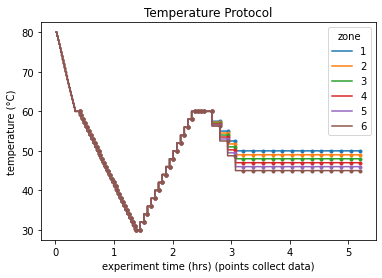

In [4]:
protocol.plot_protocol();

In [5]:
platesetup = PlateSetup({"sample_A": "A1", "sample_B": ["A2", "A3"]})

In [6]:
exp = Experiment("example-experiment", protocol, platesetup)

In [7]:
exp

# QS Experiment example-experiment (INIT)

Run Protocol Prot_2022-01-10T19-42-41 with sample volume 50.0 µL and run mode standard:
(default filters x3-m5)

  1. Stage with 21 cycles (total duration 19m57s) of [80.00 80.00 80.00 80.00 80.00 80.00] °C to [60.00 60.00 60.00 60.00 60.00 60.00] °C for 57.0 second/cycle, -1.0 delta_degree_Celsius°C/cycle from cycle 2
  2. Stage with 1 cycle (total duration 120s) of [60.00 60.00 60.00 60.00 60.00 60.00] °C for 120 second/cycle
  3. Stage with 31 cycles (total duration 59m56s) of [60.00 60.00 60.00 60.00 60.00 60.00] °C to [30.00 30.00 30.00 30.00 30.00 30.00] °C for 116.0 second/cycle, -1.0 delta_degree_Celsius°C/cycle from cycle 2 (collects default)
  4. Stage with 16 cycles (total duration 60m) of [30.00 30.00 30.00 30.00 30.00 30.00] °C to [60.00 60.00 60.00 60.00 60.00 60.00] °C for 225.0 second/cycle, 2.0 delta_degree_Celsius°C/cycle from cycle 2 (collects default)
  5. Stage with 3 cycles (total duration 9m) of [60.00 60.00 60.00 60.00 60.00 60.00] °C for 3 minute/cycle (collects x1-m4, x3-m5)
  6. Stage with 1 cycle (total duration 40m) of:
      1. [60.00 60.00 60.00 60.00 60.00 60.00] °C for 480.0 second/cycle (collects x1-m4)
      2. [57.50 57.25 57.00 56.75 56.50 56.25] °C for 480.0 second/cycle (collects x1-m4)
      3. [55.00 54.50 54.00 53.50 53.00 52.50] °C for 480.0 second/cycle (collects x1-m4)
      4. [52.50 51.75 51.00 50.25 49.50 48.75] °C for 480.0 second/cycle (collects x1-m4)
      5. [50.00 49.00 48.00 47.00 46.00 45.00] °C for 480.0 second/cycle (collects x1-m4)
  7. Stage with 6 cycles (total duration 60m) of [50.00 49.00 48.00 47.00 46.00 45.00] °C for 10 minute/cycle (collects x1-m4)
  8. Stage with 6 cycles (total duration 60m) of [50.00 49.00 48.00 47.00 46.00 45.00] °C for 10 minute/cycle (collects x1-m4)

Plate setup:

 - sample_A: ['A1']
 - sample_B: ['A2', 'A3']

- Created: 2022-01-10 19:43:08.510604
- Written by: QSLib 0.5.0.post1.dev5+g6c3de52.d20220111
- Read by: QSLib 0.5.0.post1.dev5+g6c3de52.d20220111


In [10]:
Machine("example-machine").run_status()

RunStatus(name='-', stage=-1, num_stages=-1, cycle=-1, num_cycles=-1, step=-1, point=0, state='Idle')

In [11]:
exp.run("example-machine")

In [12]:
exp.sync_from_machine()

In [13]:
exp.abort()

In [ ]:
Machine("example-machine").list_runs_in_storage()

In [15]:
done_exp = Experiment.from_machine("qpcr1", "a-run-name")

Or

In [ ]:
done_exp = Experiment.from_file("file_name.eds")

In [ ]:
done_exp.plot_protocol()

In [ ]:
done_exp.plot_anneal_melt()

In [ ]:
done_exp.plot_over_time()